In [153]:
import pandas
import matplotlib.pyplot as pyplot

# Read in the data and display the first 5 columns
dataframe = pandas.read_csv('./calendar.csv')

# Set the date column to be a pandas datetime column
dataframe['date'] = pandas.to_datetime(dataframe['date'])
dataframe.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


The calendar data set includes the listing ID, calendar date, and whether the listing is available. Counting the number of unavailable dates in a give month should give an idea of the busiest months of year to visit Seattle.

In [154]:
# Check if there are any null values in the available or date columns

nullAvailability = dataframe['available'].isnull().sum()
nullDates = dataframe['date'].isnull().sum()

nullAvailability, nullDates

(0, 0)

There are no null dates, or availability values which makes data cleaning simple. Display a bar chart with availability by date

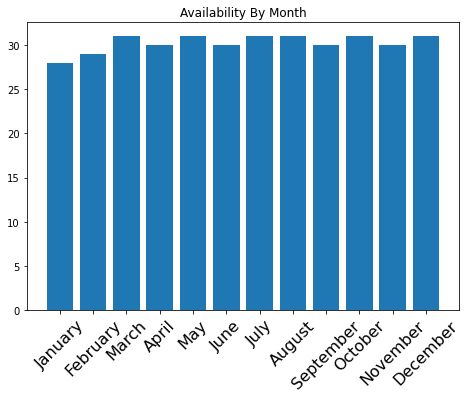

In [165]:
# Group by date, and availability
availabilityByDate = dataframe.groupby(['date', 'available'], as_index=False).size()

# Locate only the listings that not available on a given date
availabilityByDate = availabilityByDate.loc[availabilityByDate['available'] == 'f']

# Only concerned with 2016 data
availabilityByDate = availabilityByDate.loc[availabilityByDate['date'].dt.year == 2016]

# Group the listings by Month
availabilityByDate = availabilityByDate.groupby(pandas.Grouper(key='date', axis=0, freq='M'), as_index=False).size()

# Add the month name
availabilityByDate['month'] = availabilityByDate['date'].dt.strftime('%B')

# Sort by the date
availabilityByDate = availabilityByDate.sort_values(by=['date'])

# Plot a bar graph detailing availability by month
graph = pyplot.figure().add_axes([0, 0, 1, 1])
pyplot.setp(graph.get_xticklabels(), fontsize=16, rotation='45')
pyplot.title("Availability By Month")

graph.bar(availabilityByDate['month'], availabilityByDate['size'])

pyplot.show()

The graph shows that the months with the fewest vacancies are January, and February. These are the busiest months of the year to vist Seattle